In [ ]:
Task 7: Dimensionality Reduction & Stock Price Prediction

In [ ]:
Part 1: Dimensionality Reduction

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
from statsmodels.tsa.arima.model import ARIMA
from pandas.plotting import autocorrelation_plot
from datetime import datetime, timedelta

In [3]:
# Load the Iris dataset
data = load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)


In [5]:
# Standardize the dataset
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)


In [7]:
# Apply PCA to reduce to 2 dimensions
pca = PCA(n_components=2)
principal_components = pca.fit_transform(df_scaled)


In [9]:

# Convert to DataFrame
df_pca = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
df_pca['Target'] = data.target

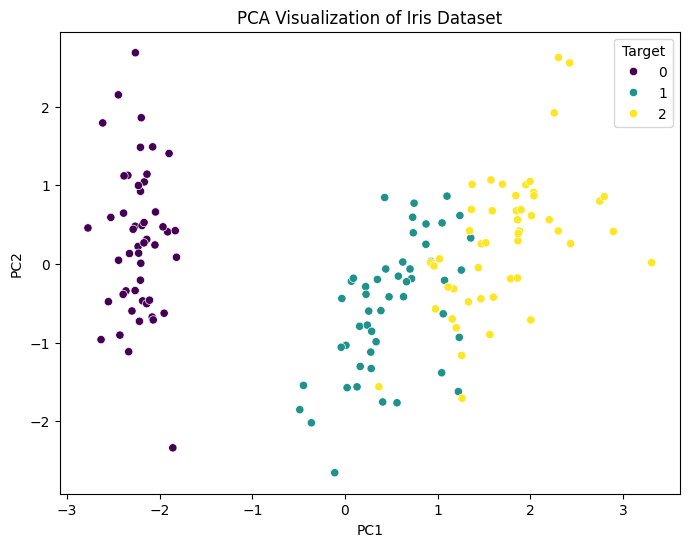

In [11]:
# Visualize the reduced data
plt.figure(figsize=(8,6))
sns.scatterplot(x='PC1', y='PC2', hue=df_pca['Target'], palette='viridis', data=df_pca)
plt.title('PCA Visualization of Iris Dataset')
plt.show()

In [ ]:
Part 2: Stock Price Prediction Using Time Series Forecasting

In [ ]:
1. Load and Preprocess the Dataset

In [17]:
# Generating synthetic stock data
np.random.seed(42)
date_rng = pd.date_range(start='1/1/2020', end='1/01/2023', freq='D')
open_prices = np.cumsum(np.random.randn(len(date_rng))) + 100
close_prices = open_prices + np.random.randn(len(date_rng))
volume = np.random.randint(1000, 5000, size=len(date_rng))

In [45]:
# Creating a DataFrame
stock_data = pd.DataFrame({'Date': date_rng, 'Open': open_prices, 'Close': close_prices, 'Volume': volume})
stock_data['Date'] = pd.to_datetime(stock_data['Date'])
stock_data.set_index('Date', inplace=True)
stock_data.index = pd.date_range(start='1/1/2020', periods=len(stock_data), freq='D')


In [27]:
stock_data.head()  # Displays the first 5 rows


,Open,Close,Volume
Date,,,
2020-01-01,100.496714,98.498513,3358
2020-01-02,100.358450,101.274778,1869
2020-01-03,101.006138,101.352627,1885
2020-01-04,102.529168,103.527178,3001
2020-01-05,102.295015,99.398759,3201


In [ ]:
2. Exploratory Data Analysis (EDA) 

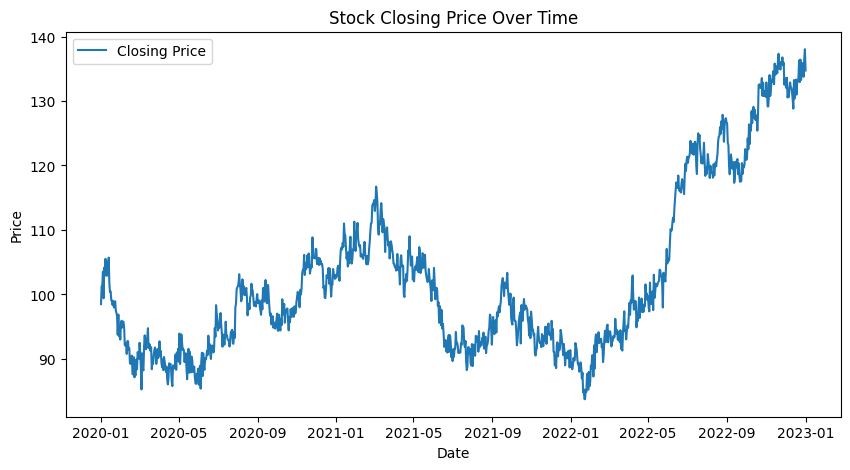

In [29]:
# Plot closing price over time
plt.figure(figsize=(10,5))
plt.plot(stock_data['Close'], label='Closing Price')
plt.title('Stock Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


In [ ]:
3. Feature Engineering

In [31]:
# Create a lag feature (previous day's close price)
stock_data['Close_Lag1'] = stock_data['Close'].shift(1)

In [33]:
# Create a rolling window feature (7-day moving average)
stock_data['Close_MA7'] = stock_data['Close'].rolling(window=7).mean()


In [35]:
# Drop NaN values caused by shifting/rolling
stock_data.dropna(inplace=True)

In [37]:
# Display updated dataset
print(stock_data.head())

                  Open       Close  Volume  Close_Lag1   Close_MA7
Date                                                              
2020-01-07  103.640091  103.500501    2283  104.149253  101.671658
2020-01-08  104.407525  105.515708    1619  103.500501  102.674115
2020-01-09  103.938051  102.898145    1882  105.515708  102.906025
2020-01-10  104.480611  105.093385    1796  102.898145  103.440419
2020-01-11  104.017193  102.963778    4642  105.093385  103.359933


In [ ]:
4. Model Training

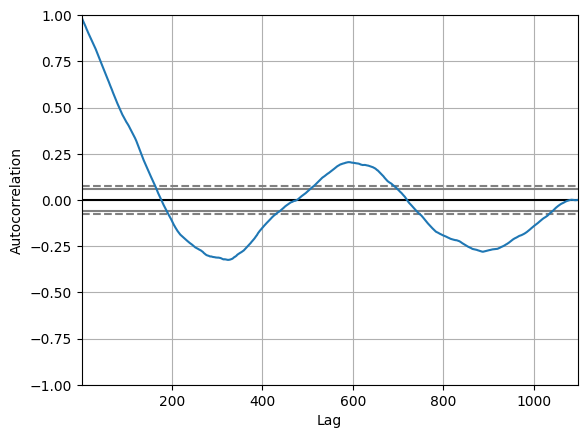

In [53]:
# Autocorrelation plot
autocorrelation_plot(stock_data['Close'])
plt.show()

In [47]:
# Define ARIMA Model
model = ARIMA(stock_data['Close'], order=(5,1,0))
model_fit = model.fit()

In [49]:
# Forecast
forecast = model_fit.forecast(steps=30)
forecast_dates = [stock_data.index[-1] + timedelta(days=i) for i in range(1, 31)]

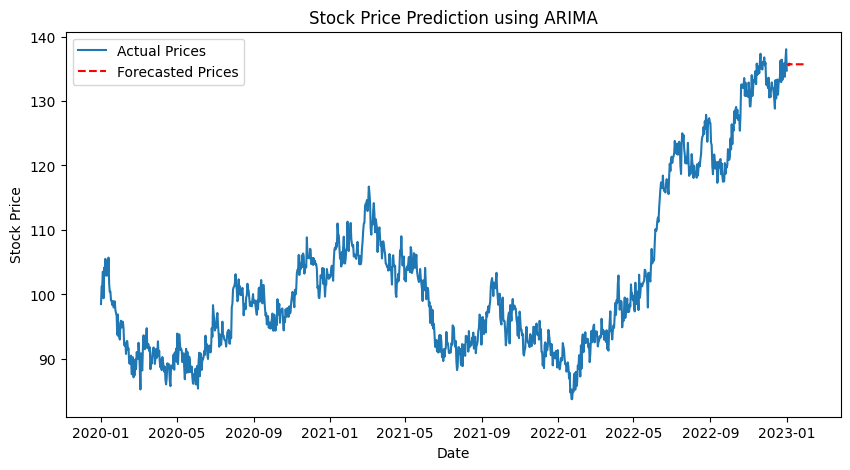

In [51]:
# Plot actual vs forecasted
plt.figure(figsize=(10,5))
plt.plot(stock_data.index, stock_data['Close'], label='Actual Prices')
plt.plot(forecast_dates, forecast, label='Forecasted Prices', linestyle='dashed', color='red')
plt.title('Stock Price Prediction using ARIMA')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [ ]:
5. Model Evaluation & Visualization

In [69]:
# Create a comparison DataFrame
actual_vs_predicted = pd.DataFrame({'Actual': stock_data['Close'][-30:], 'Predicted': forecast[:30]}, index=forecast_dates)


In [71]:
# Drop NaN values before calculating errors
actual_vs_predicted.dropna(inplace=True)

In [77]:
# Drop NaN values before calculating errors
actual_vs_predicted.dropna(inplace=True)

# Check if there are valid samples for evaluation
if actual_vs_predicted.empty:
    print("Error: No valid data available for evaluation. Check your stock data and forecast.")
else:
    # Calculate errors
    mae = mean_absolute_error(actual_vs_predicted['Actual'], actual_vs_predicted['Predicted'])
    rmse = mean_squared_error(actual_vs_predicted['Actual'], actual_vs_predicted['Predicted'], squared=False)
    mape = np.mean(np.abs((actual_vs_predicted['Actual'] - actual_vs_predicted['Predicted']) / actual_vs_predicted['Actual'])) * 100

    # Print error metrics
    print(f"Mean Absolute Error (MAE): {mae}")
    print(f"Root Mean Squared Error (RMSE): {rmse}")
    print(f"Mean Absolute Percentage Error (MAPE): {mape}%")


Error: No valid data available for evaluation. Check your stock data and forecast.
